# Test A Perceptual Phenomenon: Stroop Effect

## Introduction:

The Stroop effect (named after John Ridley Stroop who first published the effect in English in 1935) is the delay in reaction time between congruent and incongruent stimuli.  Psychologists have created a psychological test, the Stroop test, that is widely used in clinical practice and investigation.

In a Stroop test participants are presented with a list of colored words.  The participant must say out loud the color of each displayed word.  Two conditions exist:

1. Words are colored according to their names (e.g. the word RED would be colored red) - this is the congruent condition.
2. Words are *not* colored according to their names (e.g. the word RED would be colored in any color other than red) - this is called the incongruent condition.

For each participant the response time to name the colors of the words in equally-sized lists is measured and recorded.

## Questions For Investigation:

### 1. What is our independent variable? What is our dependent variable?

An independent variable is the variable you manipulate or vary in an experimental study.  It is called independent because it is not influenced by any other variable in the study.  Our independent variable is the color/word combinations.

A dependent variable is the variable that changes as a result of the independent variable manipulation. It is the outcome you are interested in measuring. Our dependent variable is the time taken to name the correct color.

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

#### Task Hypotheses:

Let:

- $\mu$<sub>1</sub> = Population mean response time to answer correctly for the congruent words condition.
- $\mu$<sub>2</sub> = Population mean response time to answer correctly for the incongruent words condition.

Our hypotheses (null hypothesis is shown as H<sub>0</sub> and the alternative hypothesis is shown as H<sub>a</sub>) are:

- H<sub>0</sub>: ($\mu$<sub>1</sub> = $\mu$<sub>2</sub>) There will be no change in population mean response time between congruent and incongruent word lists.
- H<sub>a</sub>: ($\mu$<sub>1</sub> $\neq$ $\mu$<sub>2</sub>) There will be a change in population mean response time between congruent and incongruent word lists.

#### Expected Statistical Test:

A paired t-test with a confidence interval of 99% (we reject the null hypothesis if the p-value is less than 0.01) is the statistical test of choice.  This is an appropriate test because:

- We are comparing results from two similar tests using the same participants.
- This is a small sample size (less than thirty) - a z-test would be appropriate for a larger sample size.
- We are comparing the means of related sample data (not the equality between two populations), so an f-test is inappropriate.

For the results of a paired t-test to be trusted:

- The observations are independent.
- The data must be continuous when measured on a ratio or interval scale.
- The data should be roughly normal distributed - as long as there is not a major violation of normality, the paired sample t-test is robust to violations of this assumption.

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [59]:
# Load data analysis library.
import pandas as pd

# Make data frame.
stroop_data_df = pd.read_csv('stroopdata.csv')

# Show the complete Stroop dataset.
display(stroop_data_df)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


The complete Stroop dataset is shown above.

Here are some descriptive statistics for the dataset, including at least one measurement of tendency and variability.

In [60]:
# Show at least one measurement of central tendency.

# Calculate mean.
mean = stroop_data_df.mean()
print('Mean:')
print(mean)

# Calculate median.
median = stroop_data_df.median()
print('\nMedian:')
print(median)

Mean:
Congruent      14.051125
Incongruent    22.015917
dtype: float64

Median:
Congruent      14.3565
Incongruent    21.0175
dtype: float64


The congruent mean response time was 7.964792 seconds shorter than the incongruent mean response time.  The congruent median response time was 6.661 seconds shorter than the incongruent median response time.  This implies that the congruent condition has a shorter response time.

The congruent mean response time is less than the congruent median response time which implies that the congruent data is slightly (since the difference between the mean and median is small) skewed to the left.  For the incongruent data the median response time is less than the mean response time which implies that the incongruent data is skewed to the right.

In [61]:
# Show at least one measurement of variability.

# Calculate standard deviation.
standard_deviation = stroop_data_df.std()
print('Standard Deviation:')
print(standard_deviation)

# Calculate variance.
variance = stroop_data_df.var()
print('\nVariance:')
print(variance)

Standard Deviation:
Congruent      3.559358
Incongruent    4.797057
dtype: float64

Variance:
Congruent      12.669029
Incongruent    23.011757
dtype: float64


The standard deviation can be used to show the reliability of the data - a high standard deviation implies the data is widely spread and so less reliable, whereas a low standard deviation shows that the data are clustered around the mean and thus more reliable. These results imply that the incongruent data is a little less reliable than the congruent data.  This could be the result of two outliers that are spotted in the visualizations section.

The variance is the square of the standard deviation.  It can be used to check the spread of data. The variance value will be a larger number if data is spread out, and a smaller number if values are spread closely around the mean.  The results imply that the congruent data clusters more around the mean, compared with the more spread out incongruent data.  This could be the result of two outliers that are spotted in the visualizations section.

In [62]:
# Show the dataset skew
skew = stroop_data_df.skew()
print('Skew:')
print(skew)

Skew:
Congruent      0.41690
Incongruent    1.54759
dtype: float64


Skewness can be used to determine if data is distributed normally.  The congruent data is close to a normal distribution, whereas the incongruent data is skewed to the right.

### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

One of the best ways to discover patterns is to show visualizations of the data.  The data must be reshaped into a form that the visualization library can understand:

In [64]:
# Reshape data prior to analysis.

# Convert index into participant_id.
stroop_data_df.reset_index(level = 0, inplace = True)
stroop_data_df['participant_id'] = stroop_data_df['index'] + 1
del stroop_data_df['index']

# Convert data frame into long format.
stroop_data = pd.melt(stroop_data_df, 
                     id_vars = 'participant_id',
                     value_vars = ['Congruent', 'Incongruent'],
                     var_name = 'condition_type',
                     value_name = 'response_time')

# Show the reshaped data.
print(stroop_data)

    participant_id condition_type  response_time
0                1      Congruent         12.079
1                2      Congruent         16.791
2                3      Congruent          9.564
3                4      Congruent          8.630
4                5      Congruent         14.669
5                6      Congruent         12.238
6                7      Congruent         14.692
7                8      Congruent          8.987
8                9      Congruent          9.401
9               10      Congruent         14.480
10              11      Congruent         22.328
11              12      Congruent         15.298
12              13      Congruent         15.073
13              14      Congruent         16.929
14              15      Congruent         18.200
15              16      Congruent         12.130
16              17      Congruent         18.495
17              18      Congruent         10.639
18              19      Congruent         11.344
19              20  

The data has been reshaped (as seen above) and the visualizations will be created using this data.

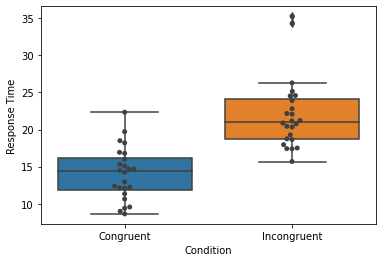

In [65]:
# Load the seaborn visualization library (considered a superset of the matplotlib library).
import seaborn as sb

# Load the matplotlib visualization library.
import matplotlib.pyplot as plot

# Plot a box plot to show the two sets of data on the same graph.
boxplot = sb.boxplot(x = "condition_type", y = "response_time", data = stroop_data)

# Plot a swarm plot on top of the box plot.
swarmplot = sb.swarmplot(x = "condition_type", y = "response_time", data = stroop_data, color = '0.25')

# Set the x and y axes labels.
swarmplot.set(xlabel = 'Condition', ylabel = 'Response Time')

# Display the graph.
plot.show()

This swarm plot shows that many of the response times in the incongruent tests were longer than the response times in the congruent tests. We also see some outliers in the incongruent response times.

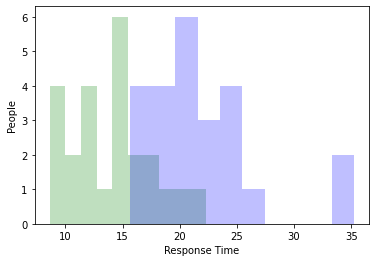

In [69]:
# Plot a histogram of congruent and incongruent data.

# Plot the congruent data.
plot.hist(stroop_data_df['Congruent'], color = 'green', alpha = 0.25)

# Plot the incongruent data.
plot.hist(stroop_data_df['Incongruent'], color = 'blue', alpha = 0.25)

# Set the x and y axes labels.
plot.xlabel('Response Time')
plot.ylabel('People')

# Display the histogram.
plot.show()

This histogram shows congruent data, incongruent data, and the mean response time to identify the color of a word.  Note there are two outliers in the 34/35 range on the histogram for the incongruent data.

A kernel density estimation (KDE) is often used to simplify the visualizations we have seen in the swarm plot and histogram.

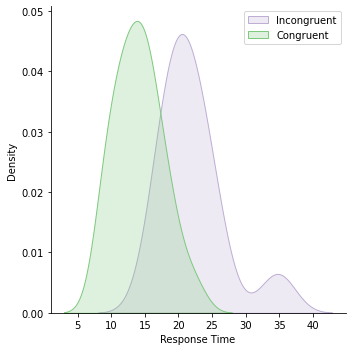

In [70]:
# Kernel density estimation (KDE).
kde = sb.displot(stroop_data,
                 x = 'response_time',
                 hue = 'condition_type',
                 kind = 'kde',
                 fill = True,
                 legend = False,
                 palette = 'Accent')

# Set x and y axes labels.
kde.set(xlabel = 'Response Time', ylabel = 'Density')

# Show legend (the legend is created here, otherwise 'condition_type' is displayed as the legend and cannot be
# altered to 'Condition', which would be the ideal option).
plot.legend(labels=(['Incongruent', 'Congruent']))

# Display KDE.
plot.show()

It can be seen that the incongruent condition is shifted to the right.  This implies that the participant response times under the incongruent condition are slower than those under the congruent condition.

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

The statistical test will be performed.  The confidence level is 99% - the null hypothesis is rejected if the p-value is less than 0.01.

In [57]:
# Perform a paired sample t-test.

# Load the statistics library.
from scipy import stats

# Calculate the t-test values.
t_value, p_value = stats.ttest_rel(stroop_data_df.Congruent, stroop_data_df.Incongruent)

# Display the statistical values.
print('t-distribution: ', t_value)
print('p-value: ', p_value)

t-distribution:  -8.020706944109957
p-value:  4.103000585711178e-08


Note that our alternative hypothesis is one-tailed whereas we have returned a two-tailed p-value.  Dividing the p-value by two, before comparing it to our selected confidence interval is required:

In [71]:
# Adjust the p-value.
adjusted_p_value = p_value / 2

# Display the adjusted p-value.
print('Adjusted p-value: ', adjusted_p_value)

Adjusted p-value:  2.051500292855589e-08


Since the adjusted value is less than 0.01, the null hypothesis can be rejected and the alternative hypothesis can be accepted.

The Stroop dataset showed that the participants could correctly identify the colored words faster when the colors matched the word (the congruent condition).  Statistical inference shows a 99% confidence that these results can be generailized to a larger population.

### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

The statistical analysis confirms the existence of a real effect, as opposed to random chance.  However, the test does not explain why this occurs.

It would seem that the words are read before the color is identified by the participant.  When the color of the word and the meaning of the word do not match (e.g. the word RED is not displayed in red) some type of cognitive reconciliation occurs which causes a delay in the response time.

The experiment could be modified to discover what happens if colored words are used in which the words are in a language the participant does not understand.  For example, the French word *rouge* appears in blue.

Other options would be to randomize the letters of the words so they would be gibberish or show them upside-down.